In [696]:
# Importing Required Libaries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [697]:
train_data=pd.read_csv("Data_Train.csv")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [698]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [699]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [700]:
train_data.dropna(inplace=True)

In [701]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [702]:
# Exploratory Data Analysis:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [703]:
# Data Transforming:
# Transforming categorical value to numerical value:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

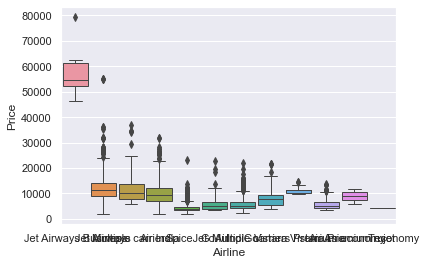

In [704]:
# Data visulization for Airline Vs price:
sns.boxplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False),width=0.9,linewidth=1,whis=2.0)
plt.show()

In [705]:
# Airline is a nominal categorical data we do oneHotencoding:
Airline=train_data["Airline"]
Airline=pd.get_dummies(data=Airline,drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [706]:
# By pandas we can convert to day,month,year from date:
train_data["Journey_day"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_data["Journey_year"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [707]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [708]:
# Drop the column Date_of_Journey.
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [709]:
train_data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [710]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

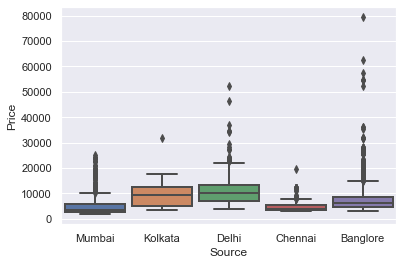

In [711]:
# Data Visulization Source Vs price:
sns.boxplot(x="Source",y="Price",data=train_data.sort_values("Source",ascending=False),width=0.9,linewidth=2)
plt.show()

In [712]:
Source=train_data[["Source"]]
Source=pd.get_dummies(data=Source,drop_first=False)
Source.head(10)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,0,1,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,0,0,1,0,0


In [713]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [714]:
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(data=Destination,drop_first=False)
Destination.head(10)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
5,1,0,0,0,0,0
6,0,0,0,0,0,1
7,0,0,0,0,0,1
8,0,0,0,0,0,1
9,0,1,0,0,0,0


In [715]:
train_data["Dep_Time"].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [716]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_Minut"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [717]:
train_data.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019,8,0
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,19:15,7h 50m,1 stop,No info,8625,27,5,2019,11,25


In [718]:
train_data["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [719]:
train_data["Arrival_hours"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_minutes"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop(["Arrival_Time"],axis=1,inplace=True)
train_data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [720]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [721]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [722]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [723]:
train_data.drop(["Duration"],axis=1,inplace=True)

In [724]:
train_data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50


In [725]:
train_data.drop(["Route"],axis=1,inplace=True)

In [726]:
train_data.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50


In [727]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [728]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [729]:
train_data.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,No info,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,No info,8625,27,5,2019,11,25,19,15,7,50


In [730]:
train_data.drop(["Additional_Info"],axis=1,inplace=True)

In [731]:
train_data.head(10)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,19,15,7,50


In [732]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [733]:
data_train.head(10)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,...,0,0,1,0,1,0,0,0,0,0
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,...,0,0,0,0,0,0,0,0,0,1
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,...,0,0,0,0,0,0,0,0,0,1
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,...,0,0,0,0,0,0,0,0,0,1
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,...,0,1,0,0,0,1,0,0,0,0


In [734]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [735]:
data_train.head(10)

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,2019,9,0,11,25,2,...,0,0,1,0,1,0,0,0,0,0
6,1,11087,12,3,2019,18,55,10,25,15,...,0,0,0,0,0,0,0,0,0,1
7,1,22270,1,3,2019,8,0,5,5,21,...,0,0,0,0,0,0,0,0,0,1
8,1,11087,12,3,2019,8,55,10,25,25,...,0,0,0,0,0,0,0,0,0,1
9,1,8625,27,5,2019,11,25,19,15,7,...,0,1,0,0,0,1,0,0,0,0


In [736]:
print("No.of.rows:",data_train.shape[0])
print("No.of.columns:",data_train.shape[1])

No.of.rows: 10682
No.of.columns: 34


In [737]:
test_data=pd.read_csv("Test_set.csv")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [738]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [739]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [740]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [741]:
test_data[["Airline"]]
Airline=pd.get_dummies(data=test_data["Airline"],drop_first=False)
Airline.head(10)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0


In [742]:
test_data["Date_of_Journey"].value_counts()

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
18/04/2019     12
1/03/2019      12
12/04/2019     11
Name: Date_of_Journey, dtype: int64

In [743]:
test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [744]:
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [745]:
test_data["Journey_year"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [746]:
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [747]:
test_data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019
5,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,12,6,2019
6,Air India,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info,12,3,2019
7,IndiGo,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info,1,5,2019
8,IndiGo,Kolkata,Banglore,CCU ? BLR,10:10,12:55,2h 45m,non-stop,No info,15,3,2019
9,Jet Airways,Kolkata,Banglore,CCU ? BOM ? BLR,16:30,22:35,6h 5m,1 stop,No info,18,5,2019


In [748]:
test_data["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [749]:
test_data[["Destination"]]
Destination=pd.get_dummies(data=test_data["Destination"],drop_first=False)
Destination.head(10)

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,1,0,0,0,0
6,0,0,0,0,0,1
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [750]:
test_data["Dep_Time"].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
22:30     1
16:35     1
15:35     1
06:15     1
23:00     1
Name: Dep_Time, Length: 199, dtype: int64

In [751]:
test_data["Dep_hours"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour

In [752]:
test_data["Dep_minutes"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute

In [753]:
test_data.drop(["Dep_Time"],axis=1,inplace=True)

In [754]:
test_data.head(10)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,10:20,4h,1 stop,No info,12,5,2019,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,21:00,13h,1 stop,No info,21,5,2019,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,23,55
5,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,12,6,2019,18,15
6,Air India,Banglore,New Delhi,BLR ? TRV ? DEL,22:35,15h 5m,1 stop,No info,12,3,2019,7,30
7,IndiGo,Kolkata,Banglore,CCU ? HYD ? BLR,20:30,5h 15m,1 stop,No info,1,5,2019,15,15
8,IndiGo,Kolkata,Banglore,CCU ? BLR,12:55,2h 45m,non-stop,No info,15,3,2019,10,10
9,Jet Airways,Kolkata,Banglore,CCU ? BOM ? BLR,22:35,6h 5m,1 stop,No info,18,5,2019,16,30


In [755]:
test_data["Arrival_hours"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour

In [756]:
test_data["Arrival_minutes"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

In [757]:
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [758]:
test_data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45
5,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,18h 20m,1 stop,In-flight meal not included,12,6,2019,18,15,12,35
6,Air India,Banglore,New Delhi,BLR ? TRV ? DEL,15h 5m,1 stop,No info,12,3,2019,7,30,22,35
7,IndiGo,Kolkata,Banglore,CCU ? HYD ? BLR,5h 15m,1 stop,No info,1,5,2019,15,15,20,30
8,IndiGo,Kolkata,Banglore,CCU ? BLR,2h 45m,non-stop,No info,15,3,2019,10,10,12,55
9,Jet Airways,Kolkata,Banglore,CCU ? BOM ? BLR,6h 5m,1 stop,No info,18,5,2019,16,30,22,35


In [759]:
test_data["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [760]:
duration=list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [761]:
test_data["Duration_hours"]=duration_hours
test_data["Duration_minutes"]=duration_minutes

In [762]:
test_data.drop(["Duration"],axis=1,inplace=True)

In [763]:
test_data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50
5,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,12,6,2019,18,15,12,35,18,20
6,Air India,Banglore,New Delhi,BLR ? TRV ? DEL,1 stop,No info,12,3,2019,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,CCU ? HYD ? BLR,1 stop,No info,1,5,2019,15,15,20,30,5,15
8,IndiGo,Kolkata,Banglore,CCU ? BLR,non-stop,No info,15,3,2019,10,10,12,55,2,45
9,Jet Airways,Kolkata,Banglore,CCU ? BOM ? BLR,1 stop,No info,18,5,2019,16,30,22,35,6,5


In [764]:
test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [765]:
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [766]:
test_data.drop(["Route"],axis=1,inplace=True)

In [767]:
test_data.drop(["Additional_Info"],axis=1,inplace=True)

In [768]:
test_data.head(10)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,45,2,50
5,Jet Airways,Delhi,Cochin,1,12,6,2019,18,15,12,35,18,20
6,Air India,Banglore,New Delhi,1,12,3,2019,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,1,1,5,2019,15,15,20,30,5,15
8,IndiGo,Kolkata,Banglore,0,15,3,2019,10,10,12,55,2,45
9,Jet Airways,Kolkata,Banglore,1,18,5,2019,16,30,22,35,6,5


In [769]:
test_data["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [770]:
test_data[["Source"]]
Source=pd.get_dummies(data=test_data["Source"],drop_first=False)
Source.head(10)

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
5,0,0,1,0,0
6,1,0,0,0,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [771]:
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)
data_test.head(10)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,...,0,1,0,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,2019,6,20,10,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,2019,19,15,19,...,0,1,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,2019,8,0,21,...,0,1,0,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,2019,23,55,2,...,0,0,0,0,0,0,1,0,0,0
5,Jet Airways,Delhi,Cochin,1,12,6,2019,18,15,12,...,0,1,0,0,0,1,0,0,0,0
6,Air India,Banglore,New Delhi,1,12,3,2019,7,30,22,...,0,0,0,0,0,0,0,0,0,1
7,IndiGo,Kolkata,Banglore,1,1,5,2019,15,15,20,...,0,0,1,0,1,0,0,0,0,0
8,IndiGo,Kolkata,Banglore,0,15,3,2019,10,10,12,...,0,0,1,0,1,0,0,0,0,0
9,Jet Airways,Kolkata,Banglore,1,18,5,2019,16,30,22,...,0,0,1,0,1,0,0,0,0,0


In [772]:
data_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [773]:
data_test.head(10)

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,2019,17,30,4,25,10,55,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,...,0,1,0,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,...,0,1,0,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0
5,1,12,6,2019,18,15,12,35,18,20,...,0,1,0,0,0,1,0,0,0,0
6,1,12,3,2019,7,30,22,35,15,5,...,0,0,0,0,0,0,0,0,0,1
7,1,1,5,2019,15,15,20,30,5,15,...,0,0,1,0,1,0,0,0,0,0
8,0,15,3,2019,10,10,12,55,2,45,...,0,0,1,0,1,0,0,0,0,0
9,1,18,5,2019,16,30,22,35,6,5,...,0,0,1,0,1,0,0,0,0,0


In [774]:
print("No.of.rows:",data_test.shape[0])
print("No.of.columns:",data_test.shape[1])

No.of.rows: 2671
No.of.columns: 32


In [775]:
# Feature_selection:
independent_variables=["Total_Stops","Journey_day","Journey_month","Journey_year","Dep_hour","Dep_Minut",
                       "Arrival_hours","Arrival_minutes","Duration_hours","Source_Chennai",
                       "Source_Delhi","Source_Kolkata","Source_Mumbai","Destination_Banglore",
                       "Destination_Cochin","Destination_Delhi","Destination_Hyderabad","Destination_Kolkata",
                       "Destination_New Delhi"]
x=data_train[independent_variables]
x

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_Minut,Arrival_hours,Arrival_minutes,Duration_hours,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,0,0,1,0,1,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,1,0,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,0,0,1,0,1,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,2019,19,55,22,25,2,0,0,1,0,1,0,0,0,0,0
10679,0,27,4,2019,20,45,23,20,2,0,0,1,0,1,0,0,0,0,0
10680,0,27,4,2019,8,20,11,20,3,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,2019,11,30,14,10,2,0,0,0,0,0,0,0,0,0,1


In [776]:
y=data_train["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [777]:
# Find the correlation:
import statsmodels.api as sm

                                   Total_Stops     Price  Journey_day  \
Total_Stops                           1.000000  0.603897    -0.009451   
Price                                 0.603897  1.000000    -0.153774   
Journey_day                          -0.009451 -0.153774     1.000000   
Journey_month                         0.054383 -0.103643    -0.038359   
Journey_year                               NaN       NaN          NaN   
Dep_hour                             -0.061476  0.006799     0.002170   
Dep_Minut                            -0.002618 -0.024458    -0.008170   
Arrival_hours                         0.038140  0.024244    -0.003245   
Arrival_minutes                      -0.106940 -0.086155    -0.017510   
Duration_hours                        0.739916  0.508778    -0.022059   
Duration_mins                        -0.136706 -0.124855    -0.008940   
Air Asia                             -0.094423 -0.133050     0.008926   
Air India                             0.271094  0.0

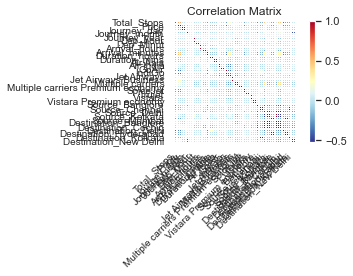

In [778]:
corr=data_train.corr()
print(corr)
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

In [779]:
# Feature_importance:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [780]:
print(selection.feature_importances_)

[0.28947716 0.16071193 0.05066375 0.         0.05495005 0.05752201
 0.06360031 0.05699235 0.1728557  0.00030491 0.00503302 0.00468112
 0.00617338 0.00434952 0.00636066 0.02673624 0.00453145 0.00123114
 0.03382529]


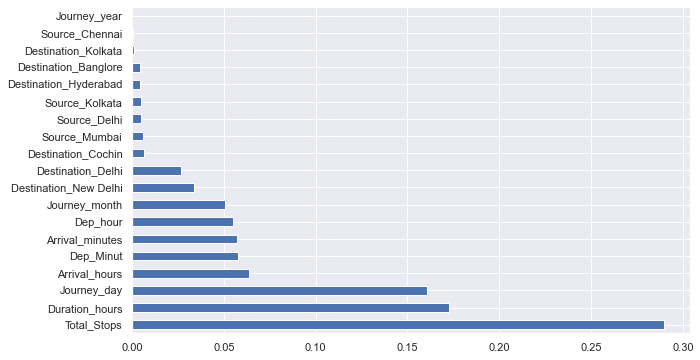

In [781]:
plt.figure(figsize=(10,6))
feat_importance=pd.Series(selection.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind="barh")
plt.show()

In [782]:
# considering the RandomForest:
# train_test_split:
from sklearn.model_selection import train_test_split

In [783]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [784]:
from sklearn.ensemble import RandomForestRegressor
radn_fr=RandomForestRegressor()
radn_fr.fit(x_train,y_train)

RandomForestRegressor()

In [785]:
# check score for training set and test set:
radn_fr.score(x_train,y_train)

0.9427125484740451

In [786]:
radn_fr.score(x_test,y_test)

0.7241283542812763

In [787]:
# predict the model with test set:
y_predict=radn_fr.predict(x_test)
price=pd.DataFrame(data={"predicted_price":y_predict.flatten()})
price

,predicted_price
0,16738.580000
1,5546.840000
2,9100.550833
3,3987.420000
4,14504.285583
...,...
2132,11887.231667
2133,5265.250000
2134,6470.370000
2135,12726.440000


In [788]:
# check the performance metrics:
from sklearn import metrics

In [789]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [790]:
print("MAE:",metrics.mean_absolute_error(y_test,y_predict))

MAE: 1365.8618088095027


In [791]:
print("MSE:",metrics.mean_squared_error(y_test,y_predict))

MSE: 5948359.963226326


In [792]:
print("RSME:",np.sqrt(mean_squared_error(y_test,y_predict)))

RSME: 2438.925985598236


In [794]:
print("R^2:",metrics.r2_score(y_test,y_predict))

R^2: 0.7241283542812763


In [796]:
# Hyper parameter Tuning:
from sklearn.model_selection import RandomizedSearchCV

In [799]:
# RandomizedSearchedCV:
# Number of tree in random forest:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to have every split:
max_features=["auto","sqrt"]
#Maximum no of level in Trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#Minimum no of samples:
min_samples_split=[2,5,10,15,100]
# minimum no of samples at  required every leaf 
min_samples_leaf=[1,2,5,10]

In [802]:
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
             "max_depth":max_depth,
              "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf}

In [807]:
rf_random=RandomizedSearchCV(estimator=radn_fr,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [809]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [812]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}